# Project: Data Science Blog Post CRISM DM Process

## Data Wrangling & Gathering

1) Pick a Data set: 

In the cell below, work with the Titanic Data, published on Kaggle.
Located on the following link:
https://www.kaggle.com/competitions/titanic/overview


In [2]:
#Set up all necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


%matplotlib inline
#!pip install seaborn


In [199]:
#!pip install seaborn --upgrade

In [198]:
#!pip install numpy --upgrade

In [200]:
#!pip install sklearn --upgrade

In [3]:
# Reading CSV file 
df_train= pd.read_csv("Titanic_train.csv")
df_test= pd.read_csv("Titanic_test.csv")

In [4]:
#Test whether load is ok
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Inspect the train data
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


(891, 12)

In [6]:
#Inspect the test data
df_test.info()
df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


(418, 11)

In [14]:
#Using a Docstring in a function
def Clean_dataset_test(a):
    """ This function uses 1 argument
    Arguments:
        a: a data frame
    Returns:
        Results on whether the dataset has any columns that are NAs
    """    
    x = a.isnull().sum()
    return x

In [19]:
print(Clean_dataset_test.__doc__)

 This function uses 1 argument
    Arguments:
        a: a data frame
    Returns:
        Results on whether the dataset has any columns that are NAs
    


In [21]:
#Execute the function 
Clean_dataset_test(df_test)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Our total training data sample consists of 891 passangers (pax) . A total of original 11 covariants have been identified.
Below are the explanation for each of the variables.


| Attribute      | Description |
| ----------- | ----------- |
| PassengerId          | A tally for each passanger        |
| Pclass            | Travel class of the travel. A lower number denotes a higher quality of travel as well as better accomodation       |
| Name                       | Passenger's  given name, surname and title        |
| Sex                        | Passenger's gender        |
| Age                        | Passanger's age (Total years of existence)     |
| SibSp                      | Indicator whether the passanger has registred siblings for the cruise        |
| Parch                      | Indicator for passanger's guardian status       |
| Ticket                     | Ticket ID        |
| Fare                                | Purchased registered price fare the pax has paid for the services        |
| Cabin                               | Cabin's ID        |
| Embarked                            | Which port has the pax embarked from        |
| Survived  (Dependent Variable)                          | Indicator for showing whether the passanger survived the incident or not        |

The data structure for both test and training samples seems to have identical schema apart from the attribute Survived. 
I expect that some attributes would not give any meaningful results however I will not drop any columns apart from Cabin as I simply do not see any reason for the cabin to affect the survivabilty of someone. In case of better data quality, such that the data cabin would also indicate at which floor the cabin was located or if we had the proximity to emergency exits and life boats as well. Then I would expect this to be of crucial importance.

The response attribute "Survived" will be used at a later stage to indicate whether we can predict in the future who would be safed in such circumstances repeat themselves.

Some further observations show interesting facts. Suprising the price of the trip varies dramatically, seems there was no ticket structure or at least from the records this cannot be concluded. 




## Data Preparation:

For the prior 3 posted questions, in this notebook I will the data steps to prepare the data for analysis>

1) Handle categorical 

2) Handle missing data

3) Provide insight into the methods you chose and why you chose them

4) Visualise the results

In [22]:
#Code goes here
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fixing the Age issue and inputing the average age as the mean of the voyagers

In [24]:
#Fix 177 passanger 
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].dropna(inplace=False).mean())
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
df_train =df_train.dropna(subset=['Embarked'])

In [26]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Investigate the Cabin cases

In [28]:
#Investigate whether we can match the missing cabins or to acquire some further information. Match with the ticket number e.g. people booking with the same tickets probably staying in the same room
rslt_df = df_train[df_train['Cabin'].isna()] 
rslt_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S


In [29]:
#Merging the missing to the original training set on ticket number
df_ctrain = df_train.dropna(subset = ["Cabin"])

inner_join = pd.merge(df_ctrain, 
                      rslt_df, 
                      on ='Ticket', 
                      how ='inner')
inner_join.tail(5)

,PassengerId_x,Survived_x,Pclass_x,Name_x,Sex_x,Age_x,SibSp_x,Parch_x,Ticket,Fare_x,...,Survived_y,Pclass_y,Name_y,Sex_y,Age_y,SibSp_y,Parch_y,Fare_y,Cabin_y,Embarked_y
14,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,...,0,1,"Robbins, Mr. Victor",male,29.699118,0,0,227.525,NaN,C
15,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,...,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,227.525,NaN,C
16,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,...,0,1,"Robbins, Mr. Victor",male,29.699118,0,0,227.525,NaN,C
17,742,0,1,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.850,...,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.000000,0,0,78.850,NaN,S
18,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.500,...,0,2,"Mudd, Mr. Thomas Charles",male,16.000000,0,0,10.500,NaN,S


To increase explanatory power and potentially locate the people who were missing cabin numbers, tried to match according to the same cabin assuming people in the same rooms are related. However its under the strong assumption that there are no mistakes in administering the cabin numbers and that people in the same cabins are families or related. At the end I take the decision to drop the column as the matching is around 10%.

In [30]:
df_train.drop(['Cabin'],axis=1,inplace=True)

In [31]:
#Test the clean cabin
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
#Investigating high prices of fares placing them in their respective 25, 50 75 and 95 percentiles of the registered prices
df_train["Fare"].value_counts(sort= True)

a = df_train["Fare"].values
df1 = pd.DataFrame(a, columns = ['Fares'])
df1.quantile([.25, .5, .75, .95], axis = 0)

,Fares
0.25,7.89580
0.50,14.45420
0.75,31.00000
0.95,112.31832


In [33]:
#Searching for extreme values top quantiles (highest paid ticket prices) 
df_train['QuantileRank']= pd.qcut(df1['Fares'],
                             q = 5, labels = False)

In [34]:
df_train =df_train.dropna(subset=['QuantileRank'])

In [35]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,QuantileRank
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,4.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,4.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0


In [36]:
#Copy of the clean data
df_train_clean = df_train

In [37]:
#Final cleaned training sample
df_train_clean.shape

(887, 12)

In [38]:
#Final test for cleanliness
df_train_clean.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
QuantileRank    0
dtype: int64

In [39]:
df_train_clean.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,QuantileRank
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,4.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,4.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0


Repeat all steps for the test dataset

In [40]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The reason why I am dropping the pax from the testing dataset is mainly as I do not wish to distort further the testing data or impose any assumptions on it. I could fill the missing values with mean or mode however it will provide more diluted results.
Thus I decide to reduce the dataset, and keep the testing dataset free of any assumptions.

In [41]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].dropna(inplace=False).mean())

In [42]:
df_test =df_test.dropna(subset=['Fare'])

In [43]:
df_test.drop(['Cabin'],axis=1,inplace=True)

In [44]:
a2 = df_test["Fare"].values

df2 = pd.DataFrame(a2, columns = ['Fares'])
df2.quantile([.25, .5, .75, .95], axis = 0)

,Fares
0.25,7.8958
0.50,14.4542
0.75,31.5000
0.95,151.5500


In [45]:
df_test['QuantileRank']= pd.qcut(df2['Fares'],
                             q = 5, labels = False)

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
PassengerId     417 non-null int64
Pclass          417 non-null int64
Name            417 non-null object
Sex             417 non-null object
Age             417 non-null float64
SibSp           417 non-null int64
Parch           417 non-null int64
Ticket          417 non-null object
Fare            417 non-null float64
Embarked        417 non-null object
QuantileRank    416 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 39.1+ KB


In [47]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
QuantileRank    1
dtype: int64

In [48]:
df_test =df_test.dropna(subset=['QuantileRank'])

In [49]:
df_test_clean = df_test

In [50]:
df_test_clean.shape

(416, 11)

In [51]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
QuantileRank    0
dtype: int64

Handling categorical variables

In [52]:
#Handling categorical variables
le = LabelEncoder()
df_train_clean['Embarked_Mapping'] = le.fit_transform(df_train_clean['Embarked'])
df_train_clean['Sex_Mapping'] = le.fit_transform(df_train_clean['Sex'])

In [53]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 888
Data columns (total 14 columns):
PassengerId         887 non-null int64
Survived            887 non-null int64
Pclass              887 non-null int64
Name                887 non-null object
Sex                 887 non-null object
Age                 887 non-null float64
SibSp               887 non-null int64
Parch               887 non-null int64
Ticket              887 non-null object
Fare                887 non-null float64
Embarked            887 non-null object
QuantileRank        887 non-null float64
Embarked_Mapping    887 non-null int64
Sex_Mapping         887 non-null int64
dtypes: float64(3), int64(7), object(4)
memory usage: 103.9+ KB


In [54]:
#Handling categorical variables
le = LabelEncoder()
df_test_clean['Embarked_Mapping'] = le.fit_transform(df_test_clean['Embarked'])
df_test_clean['Sex_Mapping'] = le.fit_transform(df_test_clean['Sex'])

In [55]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 888
Data columns (total 14 columns):
PassengerId         887 non-null int64
Survived            887 non-null int64
Pclass              887 non-null int64
Name                887 non-null object
Sex                 887 non-null object
Age                 887 non-null float64
SibSp               887 non-null int64
Parch               887 non-null int64
Ticket              887 non-null object
Fare                887 non-null float64
Embarked            887 non-null object
QuantileRank        887 non-null float64
Embarked_Mapping    887 non-null int64
Sex_Mapping         887 non-null int64
dtypes: float64(3), int64(7), object(4)
memory usage: 103.9+ KB


In [56]:
df_train_clean.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,QuantileRank,Embarked_Mapping,Sex_Mapping
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,4.0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,4.0,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,2,1


## Pose 3 Business Relevant Questions

1) Explore the factors responsible for increasing changes of survivability?

2) Do young people have higher changes of survival?

3) Does your marginal survivability increases by the conditioning of being young and travelling on high fare tickets?


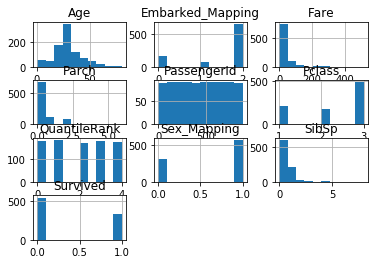

In [57]:
#Explore Distributions of the variables of interest
df_train_clean.hist();

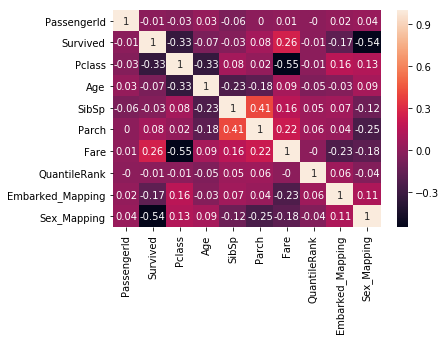

In [58]:
#Explore and visualise the correlation matrix
matrix = df_train_clean.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

### Visualizations and exploration of main questions

After we have cleaned the data looking at the correlation matrix we can see that the top three factors impacting survivals are:

a) Gender (In favour of females, which is intuitive as we would expect such behaviour on prioritisation plan) 

b) Passenger  Class (Explanation of this is that these are more influencal families who were located closed to emergency exists etc)

c) Fare price (It is closely correlated to passenger class as if you are able to afford the passenger class it is intuitive to have the opportunity to buy such tickets)

Surprisingly age was not strongly correlated to survivability  as one would expect that young mothers with children would be the prefered passangers to rescue.

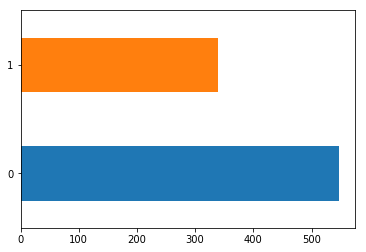

In [59]:
#Visualise overall survivability 
df_train_clean["Survived"].value_counts().plot(kind='barh');

In [60]:
df_train_clean["Survived"].value_counts(normalize=True)

0    0.617813
1    0.382187
Name: Survived, dtype: float64

Examining first, the overall survivability rate is rather low, only 38% were able to survive the incident.

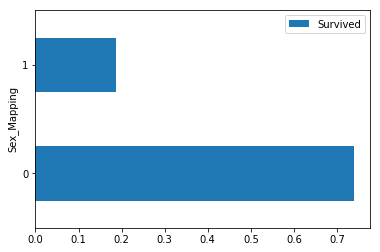

In [61]:
df_train_clean[['Sex_Mapping', 'Survived']].groupby(['Sex_Mapping']).mean().sort_values(['Survived'], ascending=False).plot(kind='barh');

In [62]:
df_train_clean[['Sex_Mapping', 'Survived']].groupby(['Sex_Mapping']).mean().sort_values(['Survived'], ascending=False)

,Survived
Sex_Mapping,
0,0.740385
1,0.187826


Clearly the data is showing us that the probability of survival is significant given a passanger is a female. That percentage is almost 75%.

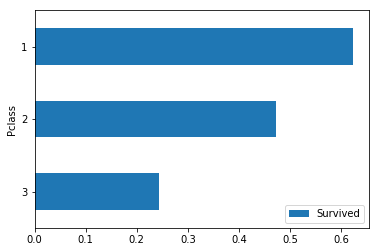

In [63]:
df_train_clean[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(['Survived'], ascending=True).plot(kind='barh');

As expected the marginal contribution of travel class to survivability is very strong. In doubles with each category upgrade.
From 20 to 40 to 60 percent.

In [64]:
#To closely examine age we would need to create categories
df_train_clean["Age_category"] = pd.cut(df_train_clean.Age,
       bins=[0,2,18,35,65,99],
       labels=["Toddler/Baby","Teenager","Young Adult","Working Class","Elderly / retired"])


In [65]:
df_train_clean[["Age_category", "Survived"]].groupby(["Age_category"]).mean().sort_values(["Survived"], ascending = False)

,Survived
Age_category,
Toddler/Baby,0.625000
Teenager,0.478261
Working Class,0.386473
Young Adult,0.352720
Elderly / retired,0.125000


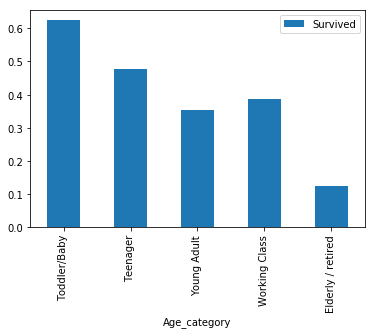

In [66]:
df_train_clean[["Age_category", "Survived"]].groupby(["Age_category"]).mean().plot(kind= "bar");

In [67]:
#Build better visuals
cross_tab_props = pd.crosstab(index=df_train_clean["Age_category"],
                             columns=df_train_clean["Survived"],
                             normalize="index")
cross_tab_props

Survived,0,1
Age_category,,
Toddler/Baby,0.375000,0.625000
Teenager,0.521739,0.478261
Young Adult,0.647280,0.352720
Working Class,0.613527,0.386473
Elderly / retired,0.875000,0.125000


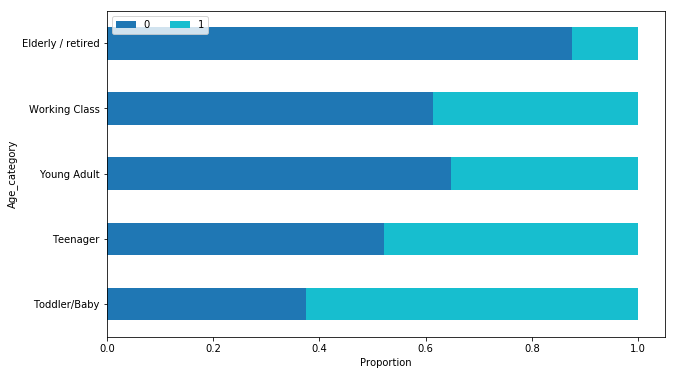

In [68]:
cross_tab_props.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Proportion")
plt.ylabel("Age_category")
plt.show()

In [69]:
#To closely examine fare price we would need to create categories similarly as we created for Age
df_train_clean["Price_category"] = pd.cut(df_train_clean.Fare,
       bins=[0,10,30,50,100,600],
       labels=["<10","10-30","30-50","50-100","100+"])

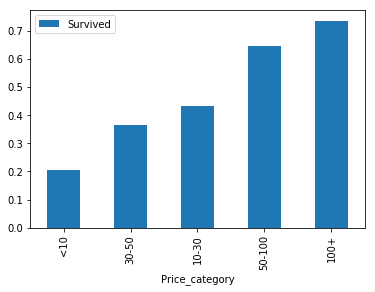

In [70]:
df_train_clean[["Price_category", "Survived"]].groupby(["Price_category"]).mean().sort_values(["Survived"], ascending = True).plot(kind ="bar");

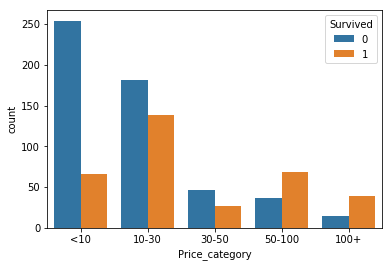

In [71]:
df1 = df_train_clean.groupby(['Price_category', 'Survived']).size().reset_index(name='count')
sns.barplot(data=df1, x='Price_category',y='count',hue='Survived');

Analysing the price tages and fares passangers have pain we clearly see a trend.

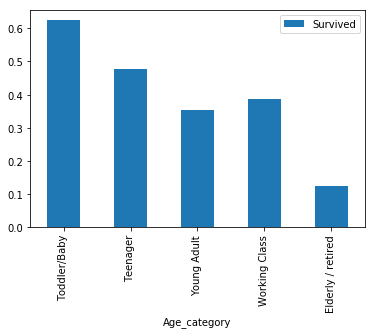

In [72]:
#df_train_clean.groupby(df_train_clean['Fare'][df_train_clean['Survived']==1]).size().reset_index(name='count')
df_train_clean[["Age_category", "Survived"]].groupby(["Age_category"]).mean().plot(kind= "bar");

In [73]:
cross_tab_prop_fare = pd.crosstab(index=df_train_clean["Price_category"],
                             columns=df_train_clean["Survived"],
                             normalize="index")
cross_tab_prop_fare

Survived,0,1
Price_category,,
<10,0.793750,0.206250
10-30,0.568750,0.431250
30-50,0.635135,0.364865
50-100,0.352381,0.647619
100+,0.264151,0.735849


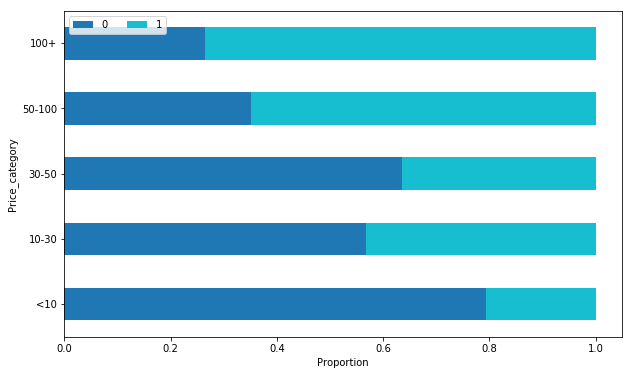

In [74]:
cross_tab_prop_fare.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Proportion")
plt.ylabel("Price_category")
plt.show()

References

correlation matrix reference
https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec


Stacked % charts
https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b


Inflation Calculator
https://www.usinflationcalculator.com/



In [ ]:
#Another scatter plot representation


def heatmap(x, y, size):
    fig, ax = plt.subplots()
    """
    Heatmap function  provides a scatterplot 
    
    Inputs long format:
    x - dimention 1 of the map
    y - dimention 2 of the map
    size - size of the 2d dimentional space which will define the size of the square
    
    Returns a with square markers and sets column names as labels
    """
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = df_train
columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 

corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)